### Zomato Data Analysis Using Python

#### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Importing Dataset

In [2]:
df = pd.read_csv("zomato_data.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### 3. Data Cleaning and Preparation

In [3]:
# removing denominator in ratings column

def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)

print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### 4. Data Summary

In [4]:
## dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
## check for null values 
print(df.isnull().sum())

#### 5. Understanding Dataset

Text(0.5, 0, 'Type of Restaurant')

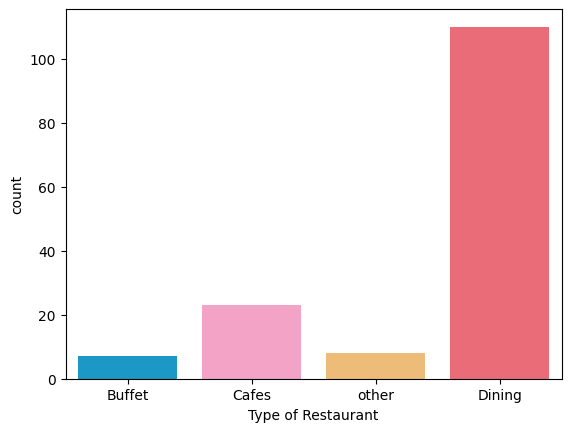

In [15]:
# checking distribution of restaurant types

sns.countplot(x = df['listed_in(type)'],hue = df['listed_in(type)'],palette=['#00A5e3','#FF96c5','#FFBF65','#FF5768'], legend=False)
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

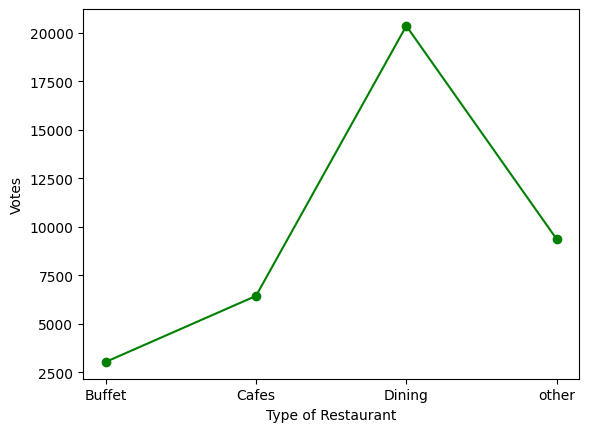

In [19]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})

plt.plot(result,c='green',marker='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Votes')

In [24]:
## Identify most voted restaurant

max_votes = df['votes'].max()
rest_max_votes = df.loc[df['votes']==max_votes,'name']

print('Restaurant with maximum votes:', rest_max_votes)

Restaurant with maximum votes: 38    Empire Restaurant
Name: name, dtype: object


Text(0, 0.5, 'Restaurant Count')

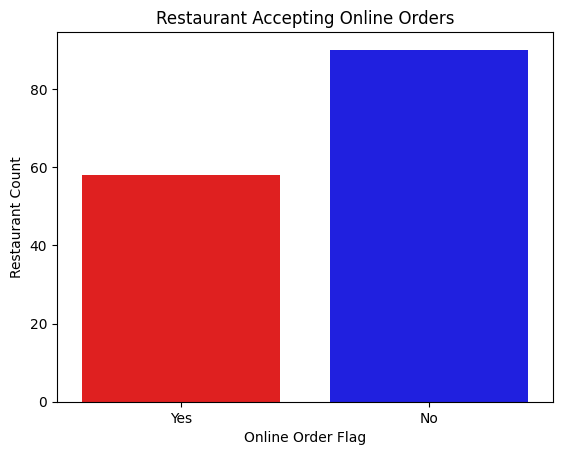

In [7]:
# distribution of online vs offline restaurant

sns.countplot(x=df['online_order'] ,hue =df['online_order'],palette=['red','blue'],legend=False )
plt.title('Restaurant Accepting Online Orders')
plt.xlabel('Online Order Flag')
plt.ylabel('Restaurant Count')

Text(0.5, 0, 'ratings')

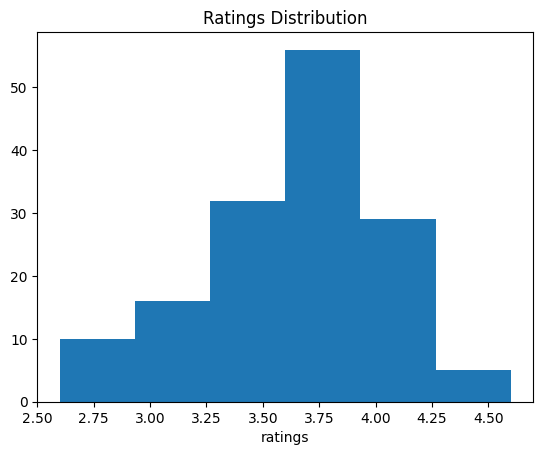

In [14]:
# Analyze distribution of ratings

plt.hist(df['rate'],bins=6)
plt.title('Ratings Distribution')
plt.xlabel('ratings')

Text(0, 0.5, 'Restaurant Count')

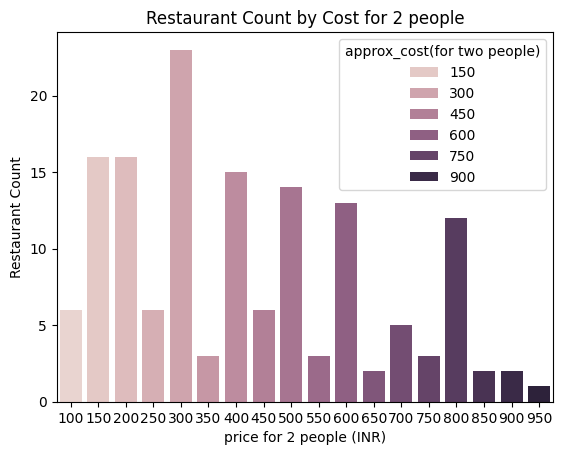

In [13]:
cost_for_two_data=df['approx_cost(for two people)']

sns.countplot(x=cost_for_two_data,hue=cost_for_two_data)

plt.title('Restaurant Count by Cost for 2 people')
plt.xlabel('price for 2 people (INR)')
plt.ylabel('Restaurant Count')


<Axes: xlabel='online_order', ylabel='rate'>

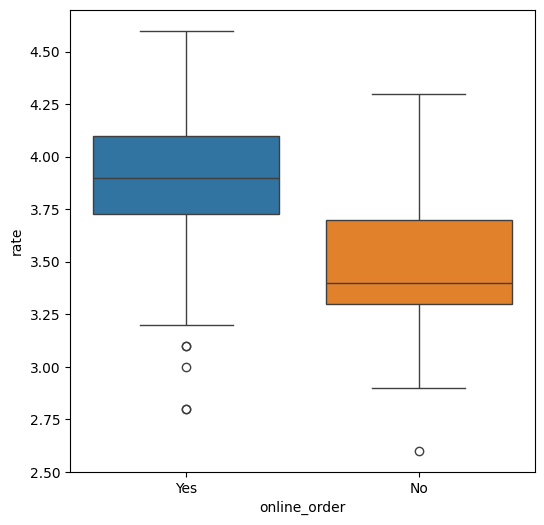

In [16]:
# Rating Comparison between Online vs Offline Restaurant

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data =df,hue = 'online_order')

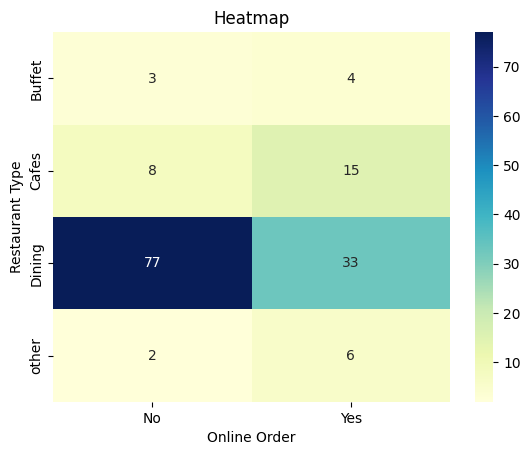

In [22]:
pivot_table= df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.show()